# Data Preparation Exercise 1

-----------------------
* 目標：讀取並且清理2017年環保署所有空氣品質觀測站的資料
    * 我們以 2015 年**花東空品區**的資料做示範
    * 請依據資料回答作業中的問題

* 資料來源：[環保署空品監測網](https://taqm.epa.gov.tw/taqm/tw/)觀測站資料
  * [下載網址](https://taqm.epa.gov.tw/taqm/tw/YearlyDataDownload.aspx)

<img class=center src=figures/epa.jpg height= 450/>

## 資料下載

- 在歷年資料的[下載網址](https://taqm.epa.gov.tw/taqm/tw/YearlyDataDownload.aspx)可以找到 1982 至今的觀測資料

<img class=center src=figures/epa_download_page.jpg height= 450/>


## 原始資料內容

- 下載的檔案為壓縮檔，每個測站的資料有兩個格式，外加兩個格式的說明檔

<img class=center src=figures/epa_zipped_files.jpg height= 450/>

## 讀取資料

pandas.read_excel() 可以直接讀取 Excel 檔案，轉換成 `pandas.DataFrame`。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('../data/104年花蓮站_20160320.xls')
data.head()

,日期,測站,測項,00,01,02,03,04,05,06,...,14,15,16,17,18,19,20,21,22,23
0,2015/01/01,花蓮,AMB_TEMP,18,18,17,17,17,17,16,...,14,14,14,14,14,13,13,13,13,14
1,2015/01/01,花蓮,CO,0.39,0.59,0.62,0.68,0.62,0.53,0.49,...,0.43,0.4,0.38,0.38,0.35,0.32,0.33,0.37,0.43,0.27
2,2015/01/01,花蓮,NO,0.6,0.7,0.8,0.2,0.3,0.2,0.1,...,0.8,0.6,0.6,0.5,0.5,0.5,0.5,0.6,1.1,0.7
3,2015/01/01,花蓮,NO2,9.9,18,14,13,16,11,6.8,...,14,13,11,12,10,9.3,9.6,10,15,9.8
4,2015/01/01,花蓮,NOx,10,18,15,14,16,11,6.9,...,15,13,12,13,11,9.8,10,11,16,10


In [3]:
data.shape

(6205, 27)

## 修改資料

環保署資料的欄位名稱是中文跟數字，為了方便後續處理，我們可以先修改欄位名稱

In [4]:
data.columns = ['date','station','item','h00','h01','h02','h03','h04','h05','h06','h07','h08','h09',
                'h10','h11','h12','h13','h14','h15','h16','h17','h18','h19','h20','h21','h22','h23']
data.head(10)

,date,station,item,h00,h01,h02,h03,h04,h05,h06,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
0,2015/01/01,花蓮,AMB_TEMP,18,18,17,17,17,17,16,...,14,14,14,14,14,13,13,13,13,14
1,2015/01/01,花蓮,CO,0.39,0.59,0.62,0.68,0.62,0.53,0.49,...,0.43,0.4,0.38,0.38,0.35,0.32,0.33,0.37,0.43,0.27
2,2015/01/01,花蓮,NO,0.6,0.7,0.8,0.2,0.3,0.2,0.1,...,0.8,0.6,0.6,0.5,0.5,0.5,0.5,0.6,1.1,0.7
3,2015/01/01,花蓮,NO2,9.9,18,14,13,16,11,6.8,...,14,13,11,12,10,9.3,9.6,10,15,9.8
4,2015/01/01,花蓮,NOx,10,18,15,14,16,11,6.9,...,15,13,12,13,11,9.8,10,11,16,10
5,2015/01/01,花蓮,O3,53,39,39,37,34,40,43,...,41,44,43,39,39,38,37,35,26,33
6,2015/01/01,花蓮,PH_RAIN,NR,NR,NR,NR,NR,NR,NR,...,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR
7,2015/01/01,花蓮,PM10,56,93,126,138,144,133,121,...,81,75,67,67,66,54,48,46,51,51
8,2015/01/01,花蓮,PM2.5,21,39,51,59,67,56,45,...,29,25,24,20,20,20,13,12,17,12
9,2015/01/01,花蓮,RAINFALL,NR,NR,NR,NR,NR,NR,NR,...,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR


## 檢查資料讀取是否正確

從前10行資料看來，觀測的品項相當多，我們可以檢查一下與資料說明文件裡提到的21個項目是否相符：

|測項簡稱   |單位  |測項名稱|
|----------|-----|-------|
|SO2	|ppb	|二氧化硫|
|CO	|ppm	|一氧化碳|
|O3	|ppb	|臭氧|
|PM10	|μg/m3	|懸浮微粒|
|PM2.5	|μg/m3	|細懸浮微粒|
|NOX	|ppb	|氮氧化物|
|NO	|ppb	|一氧化氮|
|NO2	|ppb	|二氧化氮|
|THC	|ppm	|總碳氫合物|
|NMHC	|ppm	|非甲烷碳氫化合物|
|CH4	|ppm	|甲烷|
|UVB	|UVI	|紫外線指數|
|AMB_TEMP	|℃	|大氣溫度|
|RAINFALL	|mm	|雨量|
|RH	|%	|相對溼度|
|WIND_SPEED	|m/sec	|風速(以每小時最後10分鐘算術平均)|
|WIND_DIREC	|degress	|風向(以每小時最後10分鐘向量平均)|
|WS_HR	|m/sec	|風速小時值(以整個小時算術平均)|
|WD_HR	|degress	|風向小時值(以整個小時向量平均)|
|PH_RAIN	|pH	|酸鹼值(酸雨)|
|RAIN_COND	|μS/cm	|導電度(酸雨)|

In [5]:
pd.crosstab(data['item'], 'count')

col_0,count
item,
AMB_TEMP,365
CO,365
NO,365
NO2,365
NOx,365
O3,365
PH_RAIN,365
PM10,365
PM2.5,365


從結果來看，花蓮測站的資料裡只有17個觀測品項，但是每個都有365天的數據。

## 檢查資料讀取是否正確

從說明文件和前幾列資料內容來觀察，這筆資料前三個欄位應該是文字，後面24個欄位應該是數字，讓我們檢查一下檔案讀取的是否正確

In [6]:
data.dtypes

date       object
station    object
item       object
h00        object
h01        object
h02        object
h03        object
h04        object
h05        object
h06        object
h07        object
h08        object
h09        object
h10        object
h11        object
h12        object
h13        object
h14        object
h15        object
h16        object
h17        object
h18        object
h19        object
h20        object
h21        object
h22        object
h23        object
dtype: object

## 發現問題

pandas.DataFrame 的資料型態， object 通常是 str 或是更複雜的物件，而不是數字，顯然資料讀取過程有出現問題。

然而，問題發生的原因是什麼？為什麼系統會自動把數值的欄位辨識成字元呢？

- 打開原始資料逐筆檢查當然是一種方法，但是用人工檢查 6205x24 個數字，似乎不是很實際
- 我們可以嘗試把應該是數字的資料轉換成 flaot，看看會出現什麼錯誤訊息

`floatdata = data.iloc[:,3:]
floatdata.astype(np.float32)`

<img class=center src=figures/error_casting.jpg height= 450/>

## 發現問題

從上面的嘗試，我們看到的錯誤訊息是：`ValueError: could not convert string to float: 'NR'`。可見我們理應是數值資料的欄位裡出現了 NR 這個字串。

如果查閱資料說明，我們在「10.普通測站資料註記說明」會看到：

|符號|說明|
|---|------------------|
|\# |表示儀器檢核為無效值 |
|* |表示程式檢核為無效值 |
|x |表示人工檢核為無效值|
|NR |表示無降雨|
|空白 |表示缺值|

所以，除了空白資料 pandas 會自動辨識為遺失資料之外，其他的符號，我們需要人工指定為遺失值。

## 尋找 pandas.DataFrame 裡的字串

Python 支援 regular expression，可以協助我們偵測資料裡的字串是否包含特定的字元。

In [7]:
import re

a = ['1','2','3#','4','5*','6','7x','8','NR','10']

def check_special_str(x):
    return(re.findall('\#|\*|x|NR', x) != [])

[check_special_str(x) for x in a]

[False, False, True, False, True, False, True, False, True, False]

In [8]:
def check_special_str2(x):
    if re.findall('\#|\*|x|NR', x) != []:
        return(np.nan)
    else:
        return(x)
[check_special_str2(x) for x in a]

['1', '2', nan, '4', nan, '6', nan, '8', nan, '10']

## 處理遺失值

我們可以把前面例子的作法，套用在我們的資料上。讓我們先定義兩個函數，分別偵測「遺失值」跟「無降水」，把數值分別設為 `np.nan` 跟 `0`。

In [9]:
def detect_epa_nan(x):
    if re.findall('\#|\*|x', str(x))!=[]:
        return(np.nan)
    else:
        return(x)

def detect_epa_norain(x):
    if str(x)=='NR':
        return(0)
    else:
        return(x)

floatdata = data.iloc[:,3:]
floatdata = floatdata.applymap(detect_epa_nan)
floatdata = floatdata.applymap(detect_epa_norain)
floatdata.astype(np.float32)
floatdata.head()

,h00,h01,h02,h03,h04,h05,h06,h07,h08,h09,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
0,18.00,18.00,17.00,17.00,17.00,17.00,16.00,16.00,16.00,16.00,...,14.00,14.0,14.00,14.00,14.00,13.00,13.00,13.00,13.00,14.00
1,0.39,0.59,0.62,0.68,0.62,0.53,0.49,0.46,0.45,0.47,...,0.43,0.4,0.38,0.38,0.35,0.32,0.33,0.37,0.43,0.27
2,0.60,0.70,0.80,0.20,0.30,0.20,0.10,0.30,0.80,1.80,...,0.80,0.6,0.60,0.50,0.50,0.50,0.50,0.60,1.10,0.70
3,9.90,18.00,14.00,13.00,16.00,11.00,6.80,9.30,9.80,17.00,...,14.00,13.0,11.00,12.00,10.00,9.30,9.60,10.00,15.00,9.80
4,10.00,18.00,15.00,14.00,16.00,11.00,6.90,9.60,11.00,19.00,...,15.00,13.0,12.00,13.00,11.00,9.80,10.00,11.00,16.00,10.00


## 將處理過的資料與原始資料合併

假設我們並不關心24小時內的變化，只關心每日的平均值，我們可以用處理過的資料計算每個觀測品項的日平均值：

In [10]:
data.iloc[:,3:] = floatdata
daily_data = data.loc[:,['date','station','item']]
daily_data['daily_mean'] = floatdata.mean(axis=1)
daily_data.head()

,date,station,item,daily_mean
0,2015/01/01,花蓮,AMB_TEMP,15.250000
1,2015/01/01,花蓮,CO,0.456250
2,2015/01/01,花蓮,NO,0.766667
3,2015/01/01,花蓮,NO2,12.520833
4,2015/01/01,花蓮,NOx,13.345833


## 選取特定資料

我們也可以挑選特定日期的特定觀測品項，觀察其24小時的變化。

In [11]:
data.loc[(data['date']=='2015/07/31') & (data['item']=='PM2.5'),:]

,date,station,item,h00,h01,h02,h03,h04,h05,h06,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
3595,2015/07/31,花蓮,PM2.5,12,12,10,8,5,6,6,...,9,6,8,7,8,7,8,5,7,10


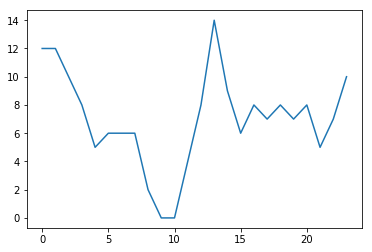

In [12]:
a = data.loc[(data['date']=='2015/07/31') & (data['item']=='PM2.5'),:]
a = np.array(a.iloc[:,3:]).flatten()
plt.plot(a)

## 選取特定資料

我們也可以從日平均資料裡挑選特定觀測品項，觀察其一年的的變化。

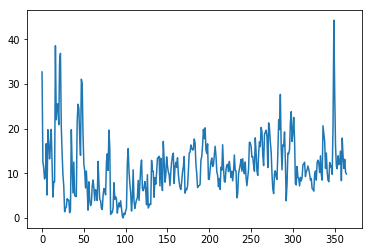

In [13]:
pm25 = daily_data.loc[daily_data['item']=='PM2.5',['date','daily_mean']]
pm25.reset_index(inplace=True)
plt.plot(pm25['daily_mean'])

## 格式重整

原始資料提供的格式，是以「測站─日期─測項」為索引（`key`），24個小時為欄位，但是在某些情況下，我們需要的是以「測站─日期─小時」為索引，22個測項為欄位，這時候就需要資料重整。

In [14]:
tmp = data.loc[data['item']=='O3',:]
o3 = pd.melt(tmp, id_vars=['date','station'], value_vars=tmp.keys()[3:], var_name='hour', value_name='O3')
o3 = o3.sort_values(['date', 'hour'])
o3.head()

,date,station,hour,O3
0,2015/01/01,花蓮,h00,53
365,2015/01/01,花蓮,h01,39
730,2015/01/01,花蓮,h02,39
1095,2015/01/01,花蓮,h03,37
1460,2015/01/01,花蓮,h04,34


透過類似的格式重整，我們可以把一個測站的多個測項變成獨立的欄位，也可以把多個測站的相同測項合併成單一的資料表。

## 用函數加速格式重整

假設我們要把花蓮測站的所有測項轉換成如前例中的獨立時間序列，然後合併成一個表格，我們可以用函數簡化這個過程：

In [15]:
# Retrieve one item from EPA data and form a time series
def retrieve_epa_item(data, var):
    tmp = data.loc[data['item']==var,:]
    ts = pd.melt(tmp, id_vars=['date'], value_vars=tmp.keys()[3:], var_name='hour', value_name=var)
    return(ts)

co = retrieve_epa_item(data, 'CO')
co.head()

,date,hour,CO
0,2015/01/01,h00,0.39
1,2015/01/02,h00,0.29
2,2015/01/03,h00,0.3
3,2015/01/04,h00,0.19
4,2015/01/05,h00,0.15


## 用函數加速格式重整 (2)

然後我們可以用迴圈對每個測項執行上面的函數，然後合併資料集：

In [16]:
# 所有測項
items = list(set(data['item']))

# Create the 1st dataframe
newdata = retrieve_epa_item(data, items[0])

# Loop through the rest of items
for i in items[1:]:
    tmp = retrieve_epa_item(data, i)
    newdata = newdata.merge(tmp, on=['date','hour'], how='left')

# Sort with date-hour to make the time-series in order
newdata = newdata.sort_values(['date', 'hour'])
newdata.head()

,date,hour,NO,O3,AMB_TEMP,WIND_DIREC,PH_RAIN,CO,WIND_SPEED,WS_HR,NOx,NO2,SO2,PM10,RAINFALL,RH,PM2.5,RAIN_COND,WD_HR
0,2015/01/01,h00,0.6,53,18,61,0,0.39,2.9,2.1,10,9.9,3.4,56,0,55,21,0,59
365,2015/01/01,h01,0.7,39,18,65,0,0.59,4,3.8,18,18,7.2,93,0,62,39,0,62
730,2015/01/01,h02,0.8,39,17,56,0,0.62,4.1,3.4,15,14,7.1,126,0,62,51,0,62
1095,2015/01/01,h03,0.2,37,17,56,0,0.68,3.8,3.7,14,13,6.6,138,0,62,59,0,60
1460,2015/01/01,h04,0.3,34,17,62,0,0.62,4.3,3.8,16,16,5.4,144,0,60,67,0,68


## 作業練習

- 請讀取104年花東空品區三個測站的資料，進行分析，並回答[以下問題](https://docs.google.com/forms/d/e/1FAIpQLSeBFJKvKnAX6ajU-sYRFEkVBBfaU9NpFvTbinDtb29opZ1dHg/viewform?usp=sf_link)
- 請讀取104年全部觀測站的資料，進行分析，並回答最後兩題
- 作業連結：https://goo.gl/forms/ARwizVHTLZqWkAH03
- 資料下載：http://140.112.67.93/downloads/
  - [104年花東空品區三個測站的資料：104_HOUR_07_20160323.zip](http://140.112.67.93/downloads/104_HOUR_07_20160323.zip)
  - [104年全部觀測站的資料：104_HOUR_00_20160323.zip](http://140.112.67.93/downloads/104_HOUR_00_20160323.zip)
- 請在 2018/12/01 00:00 (UTC+8) 之前完成作答，逾時不計分。